# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [63]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [64]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [65]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [66]:
len(df_raw)

400

Answer: There are 400 observations in our data set.

#### Question 2. Create a summary table

In [67]:
df_raw.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

In [68]:
print len(df_raw) 
print len(df_raw.columns)
df_raw.head(30)
#Below is the summary table. No particular reason that I chose to receive 30 results.

400
4


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [69]:
#function

#### Question 3. Why would GRE have a larger STD than GPA?

In [70]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


Answer: The reason why GRE would have a larger standard deviation than GPA is because, according to the data set
    the maximum gre score is 800 while the maximum gpa is 4. Thus there would be higher dispersion as there are more 
    values for the gre in relation to gpa. The data is spead out over a wide range of values, hence gre having a 
    higher standard deviation, while gpa is spread out over a lower range of values. This may also indicate that gre
    might not be the most reliable indication of admittance. 

#### Question 4. Drop data points with missing data


In [71]:
#These data points have missing data and have been dropped
df_raw.dropna(subset = ['admit', 'gre', 'gpa', 'prestige'])


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#These data points have missing data and have been dropped



In [72]:
#These are the total missing data values per column
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: NOT DROPPED

#### Question 6. Create box plots for GRE and GPA

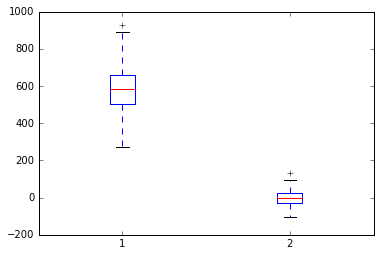

In [86]:
#Box plots for GRE and GPA

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

gre = np.random.normal (588, 116, 400)
gpa = np.random.normal (3, 38, 400)
df_raw = [gre, gpa]
plt.boxplot(df_raw)
plt.show()

#### Question 7. What do this plots show?

Answer: The plots provide several details. We can see the maximum and minimum GRE scores, and the maximum and minimum
GPA scores. The median, indicated by the red line segment inside of the rectangle, coincides with the average, previously
generated in our data set. Overall, the box plot shows us the distribution of our data for GRE and GPA.

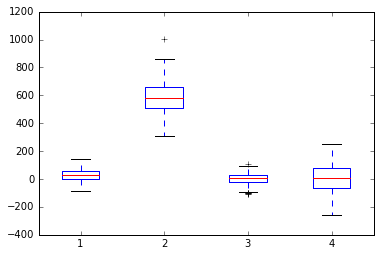

In [85]:
#Box plots for admit, gre, gpa and prestige

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

admit = np.random.normal (32, 47, 400)
gre = np.random.normal (588, 116, 400)
gpa = np.random.normal (3, 38, 400)
prestige = np.random.normal (2, 95, 400)

df_raw = [admit, gre, gpa, prestige]
plt.boxplot(df_raw)
plt.show()

#### Question 8. Describe each distribution 

Answer: The distribution looks to be noral for admit and gpa, but the outliers are more spread out for gre and prestige.
GRE and prestige appear to lie outside of the expected range.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: In regards to gre and gpa, we would not meet the assumption of a normal distribution. GRE would not be a 
symmetrical bell shaped graph however gpa will be. Gre has too many disbursed variables.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I wouldn't say that this distribution would need any corrections as the data visualization is clear to help us
make any references and estimations on the underlying objective on the factors that effect admissions. If we wanted a 
more accurate distribution than maybe we would need to eliminate some variables or decrease the amount of data points 
calculated. We could do that by taking on a smaller sample size.

#### Question 11. Which of our variables are potentially colinear? 

Answer: Our variables that are potenially colinear would be GRE and prestige

In [96]:
# create a correlation matrix for the data

import numpy as np
a = np.array([ [588, 115], [2, 5.1]]) 
b = np.corrcoef(a)
print b

[[ 1. -1.]
 [-1.  1.]]


#### Question 12. What did you find?

Answer: There is a pretty close linear relationship or maybe partial correlation.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Within this analysis plan we will measure the relationship and the influence of prestige when it comes to the 
admissions rates for undergrad schools. We will look at the dureation from January 2015 - April 2015. The specific 
question is, how much influence, if any, does an applicant's prestige have on whether they are admitted into ungrad
school or not.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that there is a correlation between prestige and a higher possibility of being admitted into
the undergrad school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data